# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=vzCC3RkHDzrQ)
<br>
>>
>> [Preparación del Entorno](#scrollTo=t-yRIho8T1a2&line=3&uniqifier=1) \\
>>   \\
>> [3 - Gráficos con Matplotlib](#scrollTo=H2X_C7TwDzrf&line=1&uniqifier=1) \\
>>
>>> [3.1. Actividad Guiada 2.2](#scrollTo=jRot8qwBDzro&line=1&uniqifier=1) \\
>>>
>>> [3.2. Conceptos Básicos en Matplotlib](#scrollTo=oiTVBanODzr2&line=1&uniqifier=1) \\
>>>>
>>>> [3.2.1. Dos interfaces de gráficos](#scrollTo=cqyTPIFaDzs6&line=1&uniqifier=1)
>>>>
>>>>> [3.2.1.1. El estilo de MATLAB](#scrollTo=3cwH0MUZDzs7&line=1&uniqifier=1) \\
>>>>>
>>>>> [3.2.1.2. Interfaz orientada a objetos](#scrollTo=K6vMsoxMDztH&line=1&uniqifier=1) \\
>>>
>>>
>>> [3.3. Marcas, Colores y Tamaños](#scrollTo=ptj0Dmd5DztQ&line=2&uniqifier=1) \\
>>>> [3.3.1. Textos](#scrollTo=-8DiXe7oDztg&line=1&uniqifier=1)
>>>>
>>>> [3.3.2. Librería Seaborn](#scrollTo=f97NBfoxDztx&line=1&uniqifier=1) \\



# Preparación del entorno

¡Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# 3 - Gráficos con Matplotlib

La librería gráfica [Matplotlib](https://matplotlib.org/), concebida por John Hunter en 2002, fué construida sobre objetos numpy (arrays N-dimensionales) y, posteriormente, adaptada a objetos Pandas (matrices con vectores datos de distintos tipos).

Actualmente, se apoya en otras librerías más simples y, de aspecto gráfico, modernizado com Seaborn y los mismos Pandas.

Los objetos numpy y pandas los trataremos, ampliamente, en el siguiente apartado, no obstante, dado que el curso presupone ciertos conocimientos de Python, mostraremos, ahora, los gráficos para poder utilizarlos en los siguientes apartados como herramienta.

Para importar la librería, habitualmente se importa el submódulo pyplot:

In [2]:
import matplotlib.pyplot as plt

##### 3.1. Actividad Guiada 2.2

Consiste en conocer mejor a las especies mediante gráficos. En concreto, se puede analizar su altura, años de vida, clase de especie (mamífero, reptil,etc.) y en cuántas películas ha salido esa especie.

>     «¡No puedes llevar a Su Alteza Real allí! Los Hutts son gangsters ...»
    ―Quarsh Panaka.

El primer paso consiste en cargar los datos de las especies y extraer las variables.

In [3]:
import numpy as np
import pandas as pd

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
entidades_df['species']["num_peliculas"] = entidades_df['species'].films.apply(lambda x: len(x))   # numero de peliculas en las que aparece
species_df = entidades_df['species'][["classification","average_height","average_lifespan","num_peliculas"]].dropna()


nombre = species_df.index.values
clasificacion = species_df.classification.values
altura_media = species_df.average_height.values
vida_media = species_df.average_lifespan.values
num_peliculas = species_df.num_peliculas.values

species_df


,classification,average_height,average_lifespan,num_peliculas
name,,,,
Human,mammal,180.0,120.0,6
Wookie,mammal,210.0,400.0,4
Hutt,gastropod,300.0,1000.0,2
Yoda's species,mammal,66.0,900.0,5
Toydarian,mammal,120.0,91.0,2
Aleena,reptile,80.0,79.0,1
Nautolan,amphibian,180.0,70.0,1
Quermian,mammal,240.0,86.0,2
Kel Dor,unknown,180.0,70.0,2


*Observa* cómo cada fila representa una especie que viene caracterizada por 5 vectores numpy.

Para saber más de los numpy, ve al capítulo [Colecciones de objetos: numpy](modulo1_tema4_Py_31_numpy.ipynb):

- **nombre**: nombre de la especie.
- **clasificacion**: clasificación de la especie.
- **altura_media**: altura media (en cm).
- **vida_media**: vida media en años.
- **num_peliculas**: número de películas en las que aparece esa especie.

### 3.2. Conceptos Básicos en Matplotlib

Se ajusta el estilo que regula el aspecto general del gráfico al seaborn-whitegrid:

In [4]:
plt.style.use('seaborn-v0_8-whitegrid');

Para definir un gráfico, la librería pyplot cuenta con muchos métodos.

Por ejemplo, para construir un gráfico de dispersión se utiliza la función `plt.scatter()`.

Veamos la dispersión entre la altura media de cada especie:

In [5]:
altura_media # vector x

array([180., 210., 300.,  66., 120.,  80., 180., 240., 180., 180., 178.,
       220., 190., 180., 170., 190.])

Y el tiempo de vida medio de cada especie:

In [6]:
vida_media # vector y

array([ 120.,  400., 1000.,  900.,   91.,   79.,   70.,   86.,   70.,
         70.,   75.,   80.,  100.,   94.,   80.,  700.])

Se especifica tanto el vector `x` como el vector `y`:

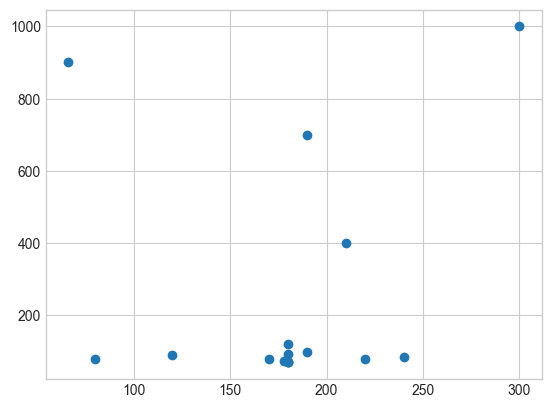

In [7]:
plt.scatter(x=altura_media,y=vida_media)
plt.show();

Observa que matplotlib ha añadido un conjunto de elementos como son los ejes con sus marcas o `ticks`. Estos elementos se configuran en el estilo.

Observa, también, que se ha llamado a la función `plt.show()`. Esta función ordena la salida del gráfico por pantalla. Es habitual su uso en scripts de python con extensión `.py`.

En notebooks, se acostumbra obviar la llamda a `plt.show()`, configurando su salida en pantalla, de forma automática, en cada celda. Para ello, se incluye el comando mágico `%matplotlib inline`, al inicio del notebook:

In [8]:
%matplotlib inline

Se puede guardar el gráfico con:

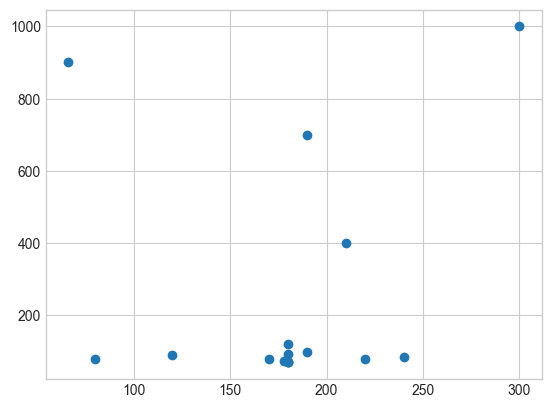

In [9]:
plt.scatter(x=altura_media,y=vida_media)
plt.savefig('www/especies.png');

> **Recuerda**: puedes abrir un fichero .png local con la función `Image()`.

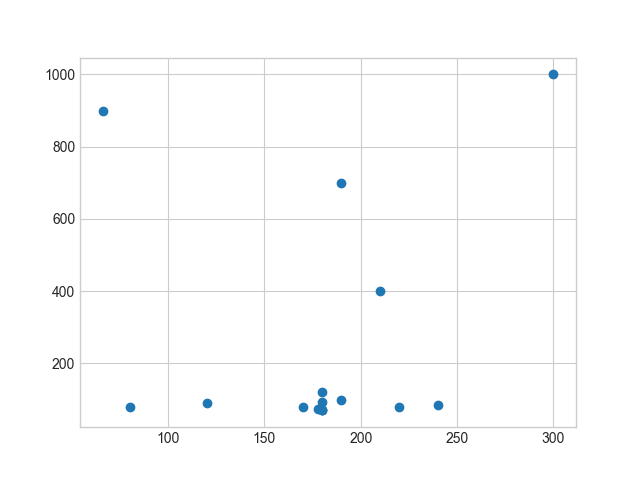

In [10]:
from IPython.display import Image
Image('www/especies.png')

#### 3.2.1. Dos interfaces de gráficos

La definición de un gráfico se puede hacer mediante dos interfaces.


##### 3.2.1.1. El estilo de MATLAB

Pytplot, en un inicio, se diseñó a imagen y semejanza de la librería gráfica de MATLAB.

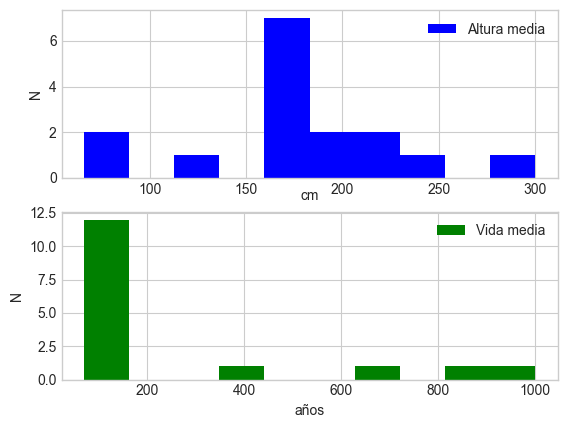

In [11]:
plt.figure();  # crea la figura del plot

# crea el primer panel y lo configura lo ejes.
plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.hist(altura_media, color="blue", label="Altura media")
plt.xlabel("cm",labelpad=-6)  # labelpad desplaça el titulo arriba
plt.ylabel("N")
plt.legend();

# crea el segundo panel y lo configura lo ejes
plt.subplot(2, 1, 2)
plt.hist(vida_media, color="green", label="Vida media");
plt.xlabel("años")
plt.ylabel("N")
plt.legend();


Observa que `plt` va añadiendo elementos al gráfico actual. Una vez se pasa al segundo panel, volver al primer panel se vuelve un trabajo complejo. Para esto se definió la siguiente interfaz.  

#####  3.2.1.2. Interfaz orientada a objetos

Se separa en figura y ejes. Esto permite hacer referencia a cualquier gráfico del panel.

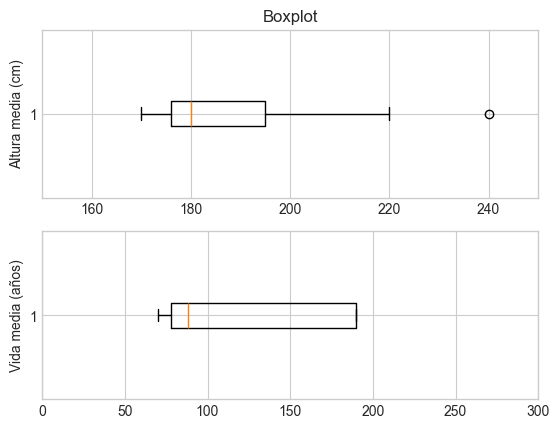

In [12]:
# Se crea la parrilla de plots
# ax será un vector de 2 objetos Axes
fig, ax = plt.subplots(2);


# Llama el método plot() sobre el objeto apropiado
ax[0].boxplot(altura_media, vert=False);
ax[1].boxplot(vida_media, vert=False);

ax[0].set(xlim=(150, 250),
       ylabel='Altura media (cm)',
       title='Boxplot');
ax[1].set(xlim=(0, 300),
       ylabel='Vida media (años)');

### 3.3 Marcas, Colores y Tamaños

En Matplotlib se pueden personalizar estos elementos, no obstante, resulta algo tedioso. El package Seaborn aporta aquí algunas facilidades, tal y como veremos.

Veamos un ejemplo de esto:

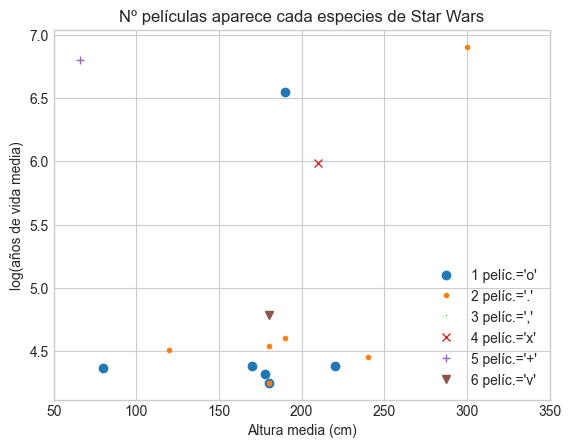

In [13]:
marcas = ['o', '.', ',', 'x', '+', 'v']
for i in range(6):
    plt.plot(altura_media[num_peliculas==i+1], np.log(vida_media[num_peliculas==i+1])
             , marcas[i]
             , label= str(i+1) + " pelíc.='{0}'".format(marcas[i]))
plt.legend(numpoints=1, loc="lower right")
plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("log(años de vida media)")
plt.xlim(50, 350);

Observa cómo, en cada iteración, se etiqueta el plot con un `label`. De esta forma se van generando elementos que, posteriormente, se incluirán en la leyenda. El color, en este caso va cambiando en cada iteración por defecto.

Ahora, veamos, un ejemplo dónde se modifica la paleta de colores `viridis` y, también, el tamaño de los puntos. Incluimos una leyenda con la escala continua de colores:

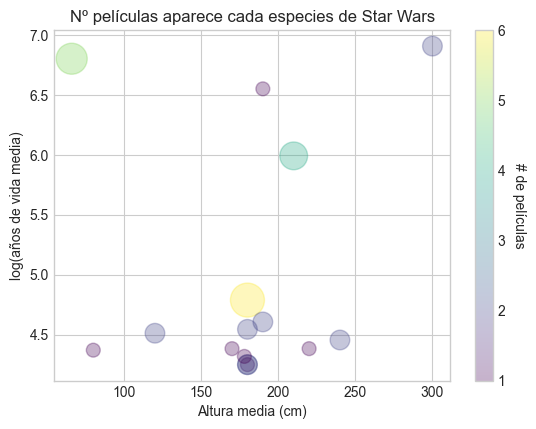

In [14]:
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis');

# leyenda del color
cbar = plt.colorbar();  # Muestra la paleta
cbar.ax.get_yaxis().labelpad = 15   # da espacio al título
cbar.ax.set_ylabel('# de películas', rotation=270) # añade título

plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("log(años de vida media)");


Otras paletas interesantes son: `'jet'`, `'RdBu'` y `'cubehelix'`.

#### 3.3.1. Textos

Para añadir textos a los gráficos, hay dos métodos:

El primero es `plt.text()` y está orientado simplemente a añadir texto.

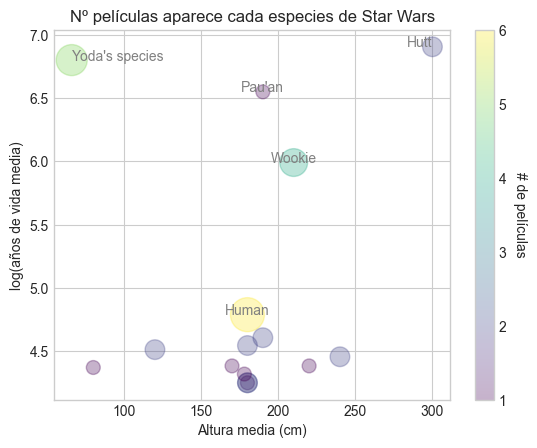

In [15]:
# Recuperamos el gráfico de especies
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')

# leyenda del color
cbar = plt.colorbar();  # Muestra la paleta
cbar.ax.get_yaxis().labelpad = 15   # da espacio al título
cbar.ax.set_ylabel('# de películas', rotation=270) # añade título

plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("log(años de vida media)");

# Add labels to the plot
style = dict(size=10, color='grey')


plt.text(300, np.log(1000), "Hutt", **style, ha='right')
plt.text(66, np.log(900), "Yoda's species", **style, ha='left')
plt.text(190, np.log(700), "Pau'an", **style, ha='center')
plt.text(210, np.log(400), "Wookie", **style, ha='center')
plt.text(180, np.log(120), "Human", **style, ha='center');


Es relevante observar que hay que añadir los textos de uno en uno, o bien, usando un loop.

El siguiente método `.annotate()` permite personalizar la ubicación y flechas:

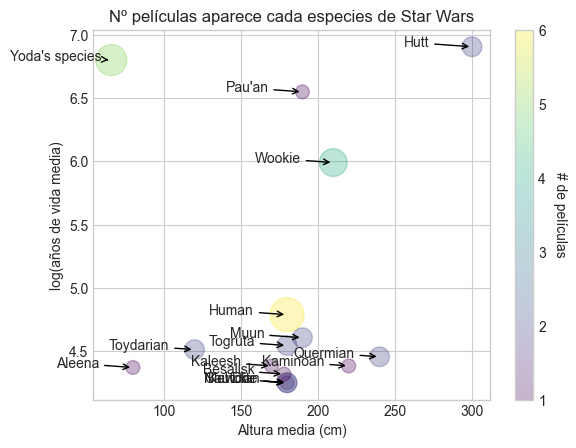

In [16]:
# Recuperamos el gráfico de especies
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')

# leyenda del color
cbar = plt.colorbar();  # Muestra la paleta
cbar.ax.get_yaxis().labelpad = 15   # da espacio al título
cbar.ax.set_ylabel('# de películas', rotation=270) # añade título

plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("log(años de vida media)");

# Add labels to the plot
style = dict(size=10, color='green')

for x1,y1,n1 in zip(altura_media, np.log(vida_media),nombre):
    plt.annotate(n1,(x1, y1)
             , arrowprops=dict(arrowstyle="->")
             , textcoords="offset points" # desplaza el punto
             , xytext=(-40,0)  # distancia desplazamiento
             , ha='center')   # centrado



No es muy estético, pero puede ser útil en determinados casos.

#### 3.3.2. Librería Seaborn

Automatiza la generación de gráficos con data frames aprovechando la asignación de nombres a sus filas y columnas.

Cargamos la librería y configuramos el estilo por defecto:

In [17]:
import seaborn as sns
sns.set()

Vemos que el gráfico anterior cambia de estilo:

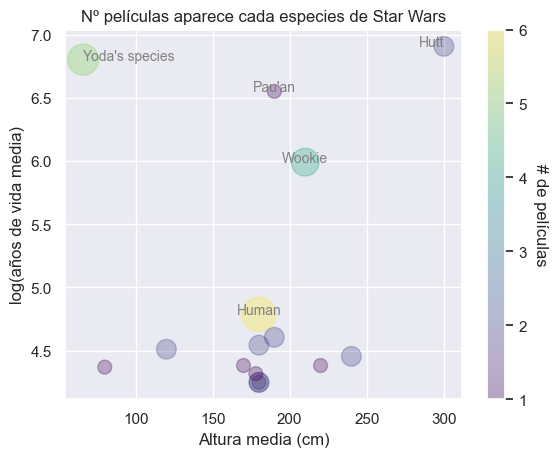

In [18]:
# Recuperamos el gráfico de especies
plt.scatter(altura_media, np.log(vida_media)
            , c=num_peliculas, s=100*num_peliculas, alpha=0.3,
            cmap='viridis')

# leyenda del color
cbar = plt.colorbar();  # Muestra la paleta
cbar.ax.get_yaxis().labelpad = 15   # da espacio al título
cbar.ax.set_ylabel('# de películas', rotation=270) # añade título

plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("log(años de vida media)");

# Add labels to the plot
style = dict(size=10, color="grey")


plt.text(300, np.log(1000), "Hutt", **style, ha='right')
plt.text(66, np.log(900), "Yoda's species", **style, ha='left')
plt.text(190, np.log(700), "Pau'an", **style, ha='center')
plt.text(210, np.log(400), "Wookie", **style, ha='center')
plt.text(180, np.log(120), "Human", **style, ha='center');


Una primera muestra de las posibilidades de Seaborn, para el análsis exploratorio, es el gráfico de dispersión 2 a 2:

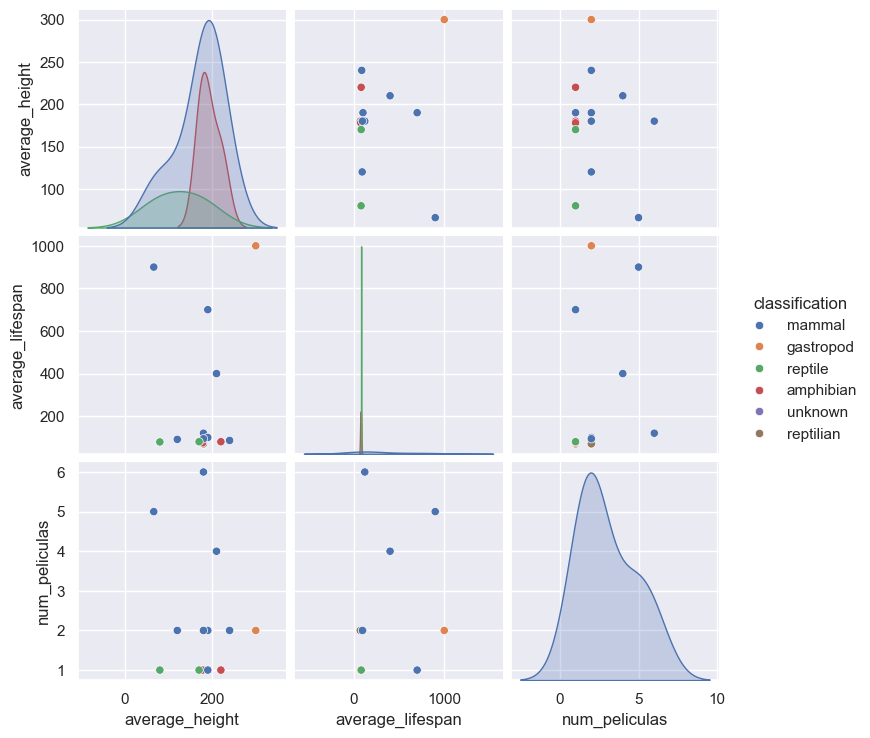

In [19]:
import warnings
warnings.filterwarnings('ignore')   # filtramos warnings para evitar problemas con especies de un individuo.

# Especies de mas de un individuo
sns.pairplot(species_df, hue="classification", height=2.5);

En diagonal, se muestra un gráfico de densidad (parecido a un histograma).

En el resto del cuadrante, se muestra el gráfico de dispersión entre dos variables. También se añaden los colores con las especies.  

¡Impresionante!

Veamos, ahora, lo fácil que resulta analizar boxplots:

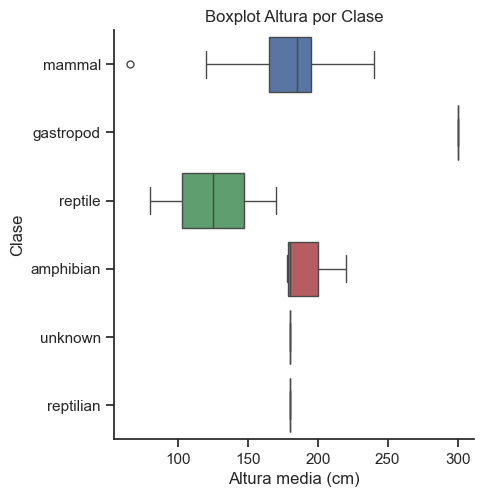

In [20]:
warnings.filterwarnings('default')   # filtramos warnings para evitar problemas con especies de un individuo.

with sns.axes_style(style='ticks'):
    g = sns.catplot(data=species_df, x="average_height", y="classification", hue="classification",  kind="box")

plt.gcf().subplots_adjust(top=0.95)
plt.title("Boxplot Altura por Clase")
plt.xlabel("Altura media (cm)")
plt.ylabel("Clase");

Finalmente, vemos el gráfico de dispersión donde se ha personalizado el color y la marca para cada especie. También, se ha personalizado el tamaño en función del número de películas.

Para hacer el gráfico más visual, sólo mostramos las especies con menos de 200 años de vida media esperada:

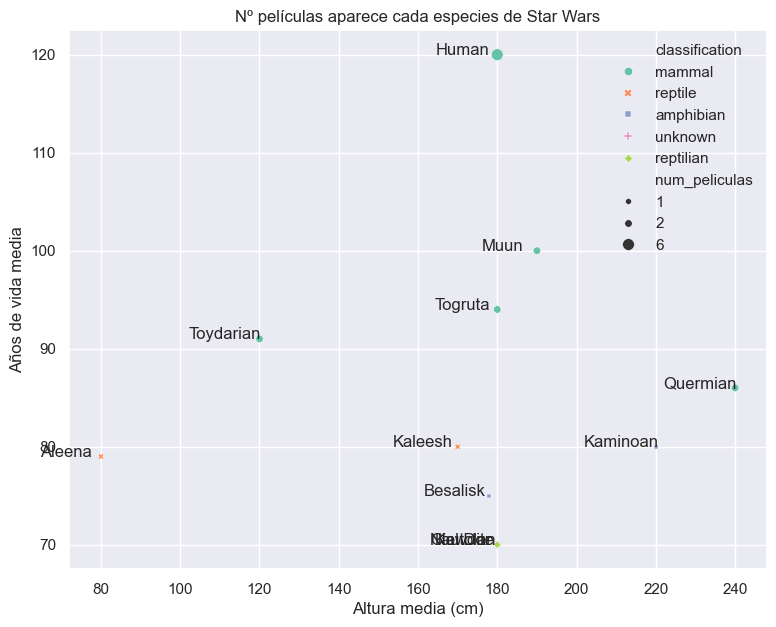

In [21]:
# Recuperamos el gráfico de especies
sns.set(rc={'figure.figsize':(9,7)});
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True);

ax = sns.scatterplot(x='average_height', y='average_lifespan'
            , hue='classification', size="num_peliculas"
            , style="classification", palette="Set2"
            , data=species_df[species_df.average_lifespan<200]);


plt.title("Nº películas aparece cada especies de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("Años de vida media");

# Añadimos etiquetas
for x1,y1,n1 in zip(altura_media[species_df.average_lifespan<200]
                    ,vida_media[species_df.average_lifespan<200]
                    ,nombre[species_df.average_lifespan<200]):
    plt.annotate(n1,(x1, y1)
             , textcoords="offset points" # desplaza el punto
             , xytext=(-25,0)  # distancia desplazamiento
             , ha='center')   # centrado


Entremos, ahora, a profundizar en la forma en que Python trata las colecciones de objetos.